# NAME::GAJJELA SAI CHARAN

# REGISTER NO::40731025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#to read the dataset
df=pd.read_csv('books.csv')

In [3]:
#for describing the dataset
df.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,NonEnglish
count,399.000000,3.990000e+02,3.990000e+02,3.990000e+02,399.000000,3.890000e+02,399.000000,399.000000,3.990000e+02,3.990000e+02,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.0
mean,4629.112782,6.202994e+06,6.403616e+06,1.003106e+07,52.273183,9.780736e+12,1998.583960,3.983784,5.856697e+04,6.338527e+04,3602.338346,1654.025063,3349.325815,12326.313283,22040.551378,24015.055138,0.0
std,2888.079524,8.537331e+06,8.707742e+06,1.371054e+07,85.456787,5.929345e+08,24.656379,0.221447,1.451770e+05,1.504474e+05,5686.207540,5975.077674,9808.978148,28852.230403,49404.841679,61550.253387,0.0
min,15.000000,3.860000e+02,3.860000e+02,1.615000e+03,1.000000,9.780007e+12,1791.000000,3.130000,3.799000e+03,8.401000e+03,57.000000,36.000000,125.000000,797.000000,2312.000000,1676.000000,0.0
25%,2158.500000,4.472250e+04,4.705950e+04,9.427875e+05,20.000000,9.780316e+12,1997.000000,3.830000,1.264800e+04,1.425700e+04,1073.500000,247.000000,670.000000,2951.500000,5295.500000,5002.500000,0.0
50%,4536.000000,5.342550e+05,5.865160e+05,2.501119e+06,32.000000,9.780554e+12,2006.000000,4.000000,2.007500e+04,2.333000e+04,1849.000000,471.000000,1232.000000,4754.000000,8242.000000,8035.000000,0.0
75%,7187.500000,1.139371e+07,1.184219e+07,1.632323e+07,55.000000,9.781250e+12,2011.000000,4.140000,4.478050e+04,4.723050e+04,3592.500000,1077.500000,2343.500000,9444.500000,17247.500000,17425.000000,0.0
max,9968.000000,3.184552e+07,3.184552e+07,5.072324e+07,834.000000,9.784770e+12,2016.000000,4.530000,1.972666e+06,2.024493e+06,49714.000000,100373.000000,149549.000000,355756.000000,656870.000000,875372.000000,0.0


# Q1: How many rows and columns are there in books.csv dataset? 

In [4]:
df.shape

(399, 24)

In [5]:
row = df.shape[0]
columns = df.shape[1]
print("No.of rows =",row)
print("No.of columns =",columns)

No.of rows = 399
No.of columns = 24


# Q2: How many books do not have an original title?

In [6]:
N = df['original_title'].isnull().sum()
print("Books do not have original title:",N)

Books do not have original title: 36


# Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [7]:
df.dropna(subset=["original_title"],inplace=True)

In [8]:
N=df['book_id'].unique().size
print("Number of unique books:",N)

Number of unique books: 363


# Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [9]:
print("Average rating of all books")
print(df['average_rating'].mean())

Average rating of all books
3.9870798898071644


# Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [10]:
#filter the dataset for books published in 2000
books_published_in_2000 = df[df['original_publication_year'] == 2000]
#to get the count of books published in 2000
num_books_published_in_2000 = len(books_published_in_2000)

print("Number of books published in the year 2000:",num_books_published_in_2000)

Number of books published in the year 2000: 7


# Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [11]:
#to find max number of ratings
max_ratings_book = df[df['work_ratings_count'] == df['work_ratings_count'].max()]

max_ratings_title = max_ratings_book['title'].values[0]

print("Book with the maximum number of ratings:",max_ratings_title)

Book with the maximum number of ratings: The Diary of a Young Girl


# Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

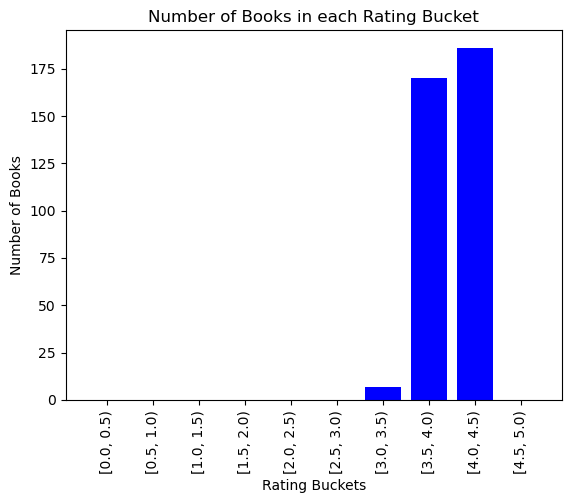

In [12]:
rating_bins = [0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]

df['rating_bucket'] = pd.cut(df['average_rating'], bins=rating_bins,right=False)

rating_counts = df['rating_bucket'].value_counts().sort_index()
#for plotting the bar graph
plt.bar(rating_counts.index.astype(str), rating_counts.values, color='blue')
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.xticks(rotation='vertical')
plt.title('Number of Books in each Rating Bucket')
plt.show()